In [ ]:
# An appromixation of the number of hours of daylight at any given latitude on a given day of the year

In [27]:
import math
import matplotlib.pyplot as plt
from datetime import datetime

In [31]:
# formula per Ecological Modeling, volume 80 (1995) pp. 87-95, called "A Model Comparison for Daylength as a Function of Latitude and Day of the Year."
# see more details - http://mathforum.org/library/drmath/view/56478.html
# Latitude in degrees, postive for northern hemisphere, negative for southern
# Day 1 = Jan 1
def day_length(day_of_year, latitude):
    P = math.asin(0.39795 * math.cos(0.2163108 + 2 * math.atan(0.9671396 * math.tan(.00860 * (day_of_year - 186)))))
    pi = math.pi
    day_light_hours = 24 - (24 / pi) * math.acos((math.sin(0.8333 * pi / 180) + math.sin(latitude * pi / 180) * math.sin(P)) / (math.cos(latitude * pi / 180) * math.cos(P)))

    return day_light_hours

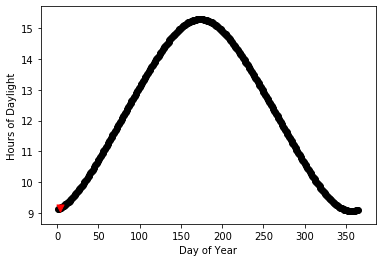

Hours of daylight today: 9.154623740491061
Hours of daylight tomorrow: 9.169190986964573
Min Daylight Hours This Year = 9.071057602618508
Max Daylight Hours This Year = 15.286031004072237


In [34]:
# plot out a full year (non-leap) for the given latitude. Boston in this example
latitude = 42.3605

f = plt.figure()
plt.ylabel('Hours of Daylight')
plt.xlabel('Day of Year')
min_light = 24.0
max_light = 0.0
for day in range(1,365):
    length_hours = day_length(day,latitude)
    
    if length_hours > max_light:
        max_light = length_hours
    
    if length_hours < min_light:
        min_light = length_hours
        
    plt.scatter(day,length_hours, c="black")

# highlight today's value
day_of_year = datetime.now().timetuple().tm_yday
plt.scatter(day_of_year,day_length(day_of_year,latitude),c="red",marker='v',s=50)
plt.show()

print("Hours of daylight today: " + str(day_length(day_of_year,latitude)))
print("Hours of daylight tomorrow: " + str(day_length(day_of_year+1,latitude)))
print("Min Daylight Hours This Year = " + str(min_light))
print("Max Daylight Hours This Year = " + str(max_light))